1-Collecte des donnnees(Bases des donnees IRIS de la bibliotheques seaborn 

In [2]:
#importation des bibliotheques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=sns.load_dataset("iris")

2-Comprendre la base des donnees

In [7]:
#les nombres des lignes et des colonnes
df.shape

(150, 5)

In [9]:
#les differentes variables de la base des donnees
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')>

In [11]:
#Resume des information sur la base des donnees
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
#les 5 premieres enregistrements
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
#les 5 aleatoirements choisis de l'enregistrement
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
22,4.6,3.6,1.0,0.2,setosa
119,6.0,2.2,5.0,1.5,virginica
93,5.0,2.3,3.3,1.0,versicolor
41,4.5,2.3,1.3,0.3,setosa
92,5.8,2.6,4.0,1.2,versicolor


In [19]:
# les 5 dernieres enregistrements
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


3-Préparation et Nettoyage des Données

In [22]:
#Gestions des valeurs manquantes
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

     pas des valeurs manquantes

In [25]:
#Supprimer les doublons et corriger les incohérences.
df.duplicated().sum()

1

In [27]:
# il existe un seul doublons .
#Supprimons le
df.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


       Il a bien ete supprime

In [119]:
# Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=['number'])

# Calcul des quartiles et de l'IQR
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Détection des valeurs aberrantes
outliers = (df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))

# Remplacement des outliers par la médiane
df[df_numeric.columns] = df_numeric.apply(lambda col: col.mask(outliers[col.name], col.median()))

print(df)  # Affiche le DataFrame mis à jour


     sepal_length  sepal_width  petal_length  petal_width    species   z-score
0             5.1          3.5           1.4          0.2     setosa -0.897674
1             4.9          3.0           1.4          0.2     setosa -1.139200
2             4.7          3.2           1.3          0.2     setosa -1.380727
3             4.6          3.1           1.5          0.2     setosa -1.501490
4             5.0          3.6           1.4          0.2     setosa -1.018437
..            ...          ...           ...          ...        ...       ...
145           6.7          3.0           5.2          2.3  virginica  1.034539
146           6.3          2.5           5.0          1.9  virginica  0.551486
147           6.5          3.0           5.2          2.0  virginica  0.793012
148           6.2          3.4           5.4          2.3  virginica  0.430722
149           5.9          3.0           5.1          1.8  virginica  0.068433

[150 rows x 6 columns]


In [121]:
df.describe(include=["number"])

,sepal_length,sepal_width,petal_length,petal_width,z-score
count,150.000000,150.000000,150.000000,150.000000,1.500000e+02
mean,5.843333,3.039333,3.758000,1.199333,-5.210647e-16
std,0.828066,0.392530,1.765298,0.762238,1.000000e+00
min,4.300000,2.200000,1.000000,0.100000,-1.863780e+00
25%,5.100000,2.800000,1.600000,0.300000,-8.976739e-01
50%,5.800000,3.000000,4.350000,1.300000,-5.233076e-02
75%,6.400000,3.300000,5.100000,1.800000,6.722490e-01
max,7.900000,4.000000,6.900000,2.500000,2.483699e+00


In [123]:
df.describe(include=["object"])

,species
count,150
unique,3
top,setosa
freq,50


4-Analyse exploratoire des donnees

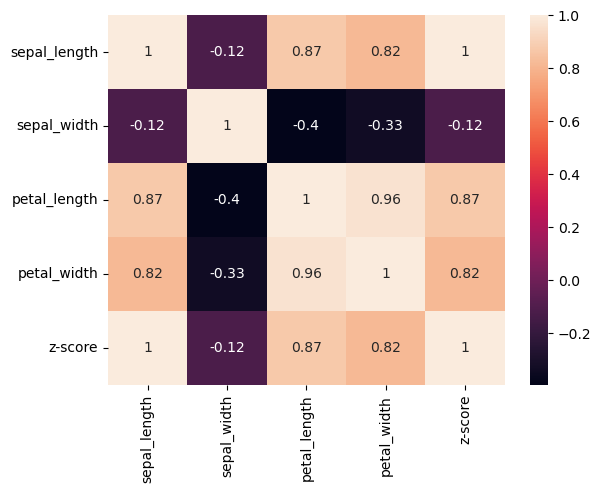

In [150]:
# Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation
correlation_matrix = df_numeric.corr()

# Visualiser la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True)
plt.show()

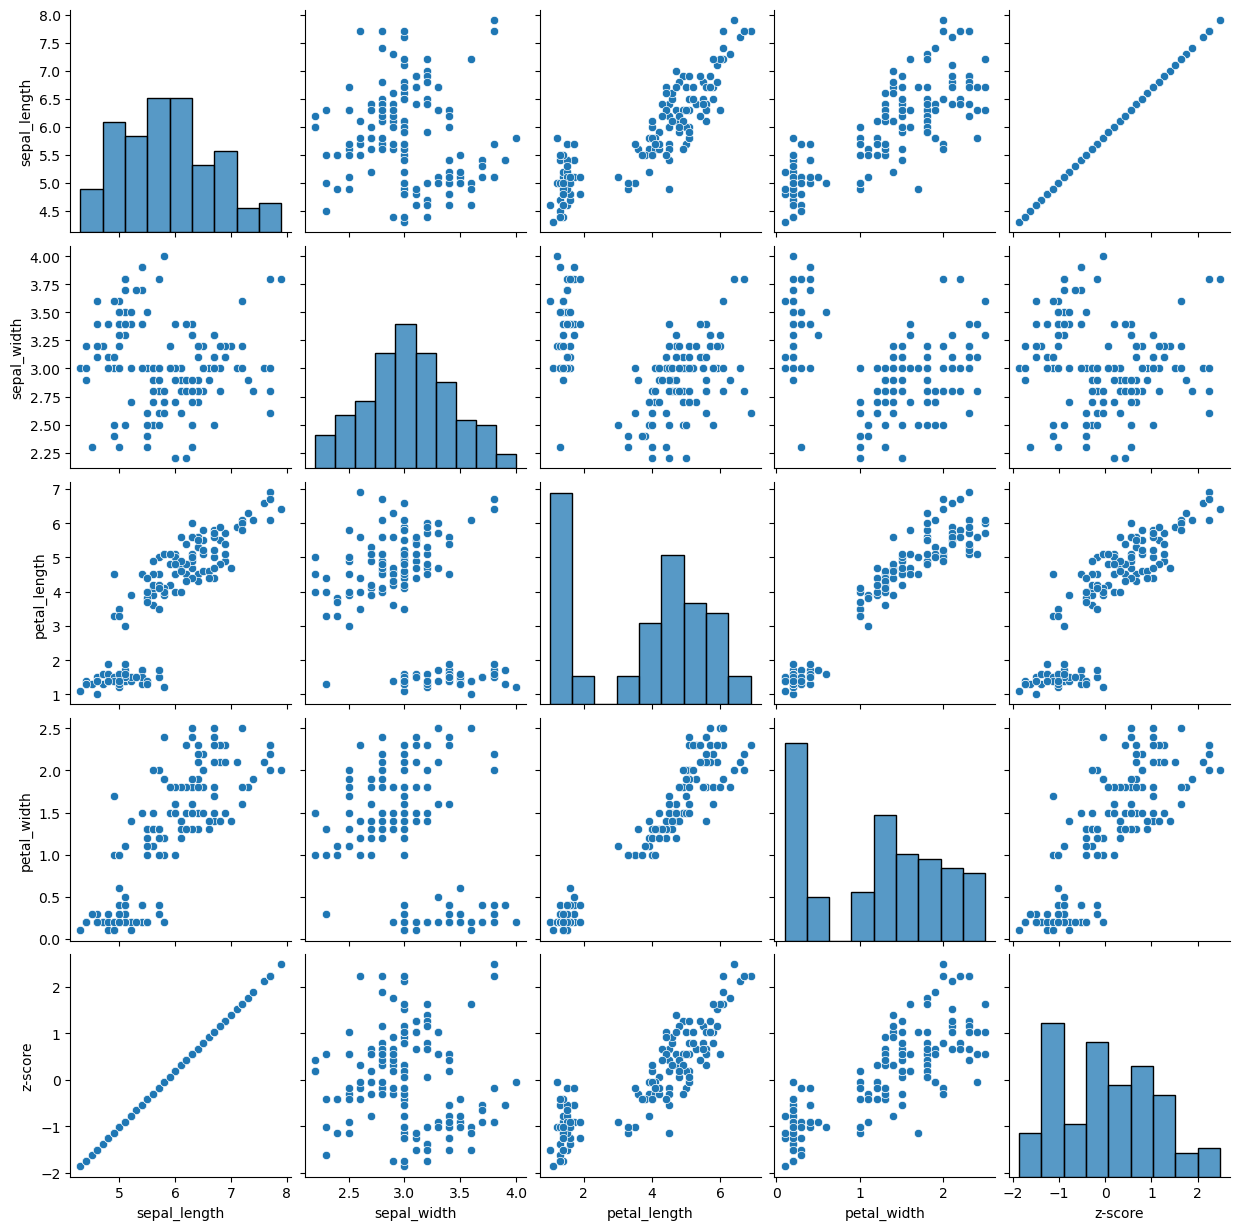

In [142]:
sns.pairplot(df)

Conclusion :

Ce projet m'a permis de mieux comprendre les étapes de l'analyse des données, 
de la collecte à la visualisation. En utilisant des outils comme Python, pandas et 
seaborn, j'ai pu identifier des relations significatives entre les variables et tirer
des insights utiles. J'ai également appris l'importance de la préparation des données 
et de la visualisation pour une analyse efficace.